<h1 align="center">What's Cooking?</h1>
<h2 align="center">M.S. in C.S. Graduate Project Report</h2>
<h2 align="center">Akhil Saokar, Fall 2015</h2>

<h3 align = "center"> This project will use the kaggle dataset where recipe ingredients are used to categorize the cuisine of a dish.</h3>  

## Part 1: Data Interest

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of the strongest geographic and cultural associations are tied to a region's local foods. This project deals with predicting the category of a dish's cuisine given a list of its ingredients. As seen in any document classification prediction algorithm, this ‘what’s cooking?’ project has been broken down to obtain a ‘bag-of-ingredients’ model, on the lines of the ‘bag-of-words’ model.

This problem statement has many utilities like finding the most common ingredients in a dish generally as
per cuisine, finding which possible restaurant to open nearby as per the local ingredients in that
market, etc.

## Part 2: Data Acquisition and Pre-Processing

### (a) *Reading in the training & the testing data file and display as a Panda DataFrame*

In [1]:
import pandas as pd
import numpy as np

training_load_data = pd.read_json('../Data/train.json')
training_load_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [2]:
testing_load_data = pd.read_json('../Data/test.json')
testing_load_data.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


### (b) *Cleaning the data*

In [3]:
import nltk
# The following packages needs to be imported in order to use the nltk library's functions 
nltk.download('snowball_data')
nltk.download('stopwords')

[nltk_data] Downloading package snowball_data to
[nltk_data]     /Users/akhilsaokar2312/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhilsaokar2312/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import re
import string
def removePunctuation(text):
    """Removes anything betwwen brackets (generally for liquid ingredients), punctuation, 
       changes to lower case, and strips leading and trailing spaces.
    Args:
        text (str): A string.
    Returns:
        str: The cleaned up string.
    """
    no_bracket_string = re.sub(r'\([^)]*\)', '', text)
    return re.sub(r'[^A-z\s]','',no_bracket_string).lower().strip()

In [5]:
import nltk
from nltk.stem import SnowballStemmer
def stemWords(text):
    """Stems the ingredient provided in the function
    Args:
        text (str): A list element.
    Returns:
        str: The stemmed ingredient.
    """
    recipe = [SnowballStemmer("english").stem(word) for word in text.split(" ")]
    return recipe

In [6]:
from nltk.corpus import stopwords # Import the stop word list

def removeStopWords(text):
    """Removes the stop words in the recipe provided in the function
    Args:
        text (str): A list element (ingredients in the recipe).
    Returns:
        str: The remaining string.
    """
    return [word for word in text.split(" ") if not word in stopwords.words("english")]

### (c) *Find the Cuisine counts in the training data*

In [7]:
from collections import Counter

# The following line of code removes the unicode ascii character from the JSON object
flattened_cuisines = [cuisine_string.encode('utf-8') for cuisine_string in training_load_data.cuisine]
# The following line of code gets a list of the counts of each cuisine in the training data
all_cuisines_count = Counter(flattened_cuisines).most_common()
print all_cuisines_count

[('italian', 7838), ('mexican', 6438), ('southern_us', 4320), ('indian', 3003), ('chinese', 2673), ('french', 2646), ('cajun_creole', 1546), ('thai', 1539), ('japanese', 1423), ('greek', 1175), ('spanish', 989), ('korean', 830), ('vietnamese', 825), ('moroccan', 821), ('british', 804), ('filipino', 755), ('irish', 667), ('jamaican', 526), ('russian', 489), ('brazilian', 467)]


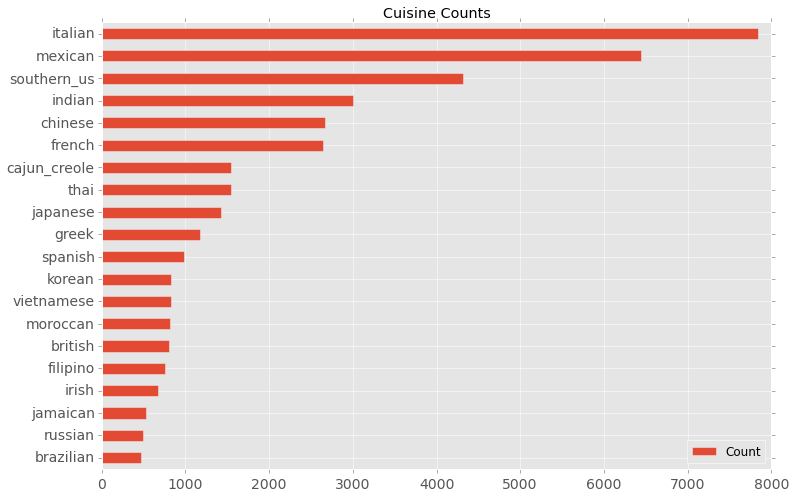

In [8]:
# To plot the cuisine counts obtained, we use a barplot
%matplotlib inline  
import matplotlib.pyplot as plt
plt.style.use('ggplot')
all_cuisines_dataframe = pd.DataFrame(all_cuisines_count, columns=['Cuisine', 'Count'])
cuisine_count_plot = all_cuisines_dataframe.sort(ascending=True, inplace=False).plot(kind='barh', title ="Cuisine Counts",figsize=(12,8), fontsize=14)
cuisine_count_plot.set_yticklabels(all_cuisines_dataframe.Cuisine)
cuisine_count_plot.invert_yaxis()
plt.show()

#### Hence, we can see that *'Italian'*, *'Mexican'*, *'Southern US'*, *'Indian'*, *'Chinese'* and *'French'* cuisines are among the more popular cuisines.

### (d) *Finding the set of ingredients used in all recipies, per cuisine*

In [9]:
training_cuisine_ingredient_corpus = training_load_data.groupby('cuisine')['ingredients'].sum().reset_index()

for k,v in training_cuisine_ingredient_corpus['cuisine'].iteritems():
    training_cuisine_ingredient_corpus['ingredients'][k] = map(removePunctuation,training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = map(stemWords,training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = list(' '.join(innerListElement) for innerListElement in training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = map(removeStopWords,training_cuisine_ingredient_corpus['ingredients'][k])
    training_cuisine_ingredient_corpus['ingredients'][k] = list(' '.join(innerListElement) for innerListElement in training_cuisine_ingredient_corpus['ingredients'][k])

### (e) *Finding the most common ingredients used among all the recipies*

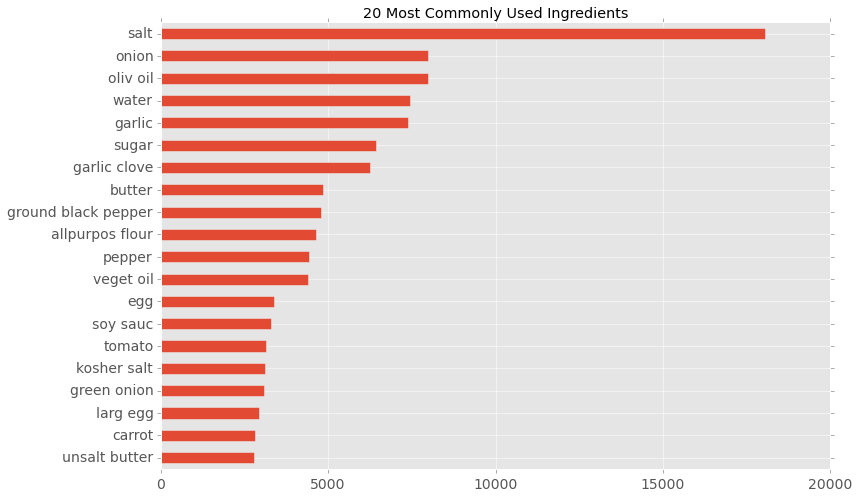

In [10]:
# Plot Ingredient Distribution of the training data set
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('ggplot')
training_cuisine_all_ingredients = [Counter(recipe) for recipe in training_cuisine_ingredient_corpus['ingredients']]
training_cuisine_ingredient_distribution = sum(training_cuisine_all_ingredients, Counter())
ingredient_fig = pd.DataFrame(training_cuisine_ingredient_distribution, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:20].plot(kind='barh', title ="20 Most Commonly Used Ingredients",figsize=(12,8), fontsize=14)
ingredient_fig.invert_yaxis()
plt.show()

#### Hence, we can see here that the most common ingredient used in the recipies is *'Salt'*, which is a must in most of the recipies as we know.

#### *Using the result obtained in *(d)*, a plot of the common ingredients per each cuisine is obtained as seen below:*

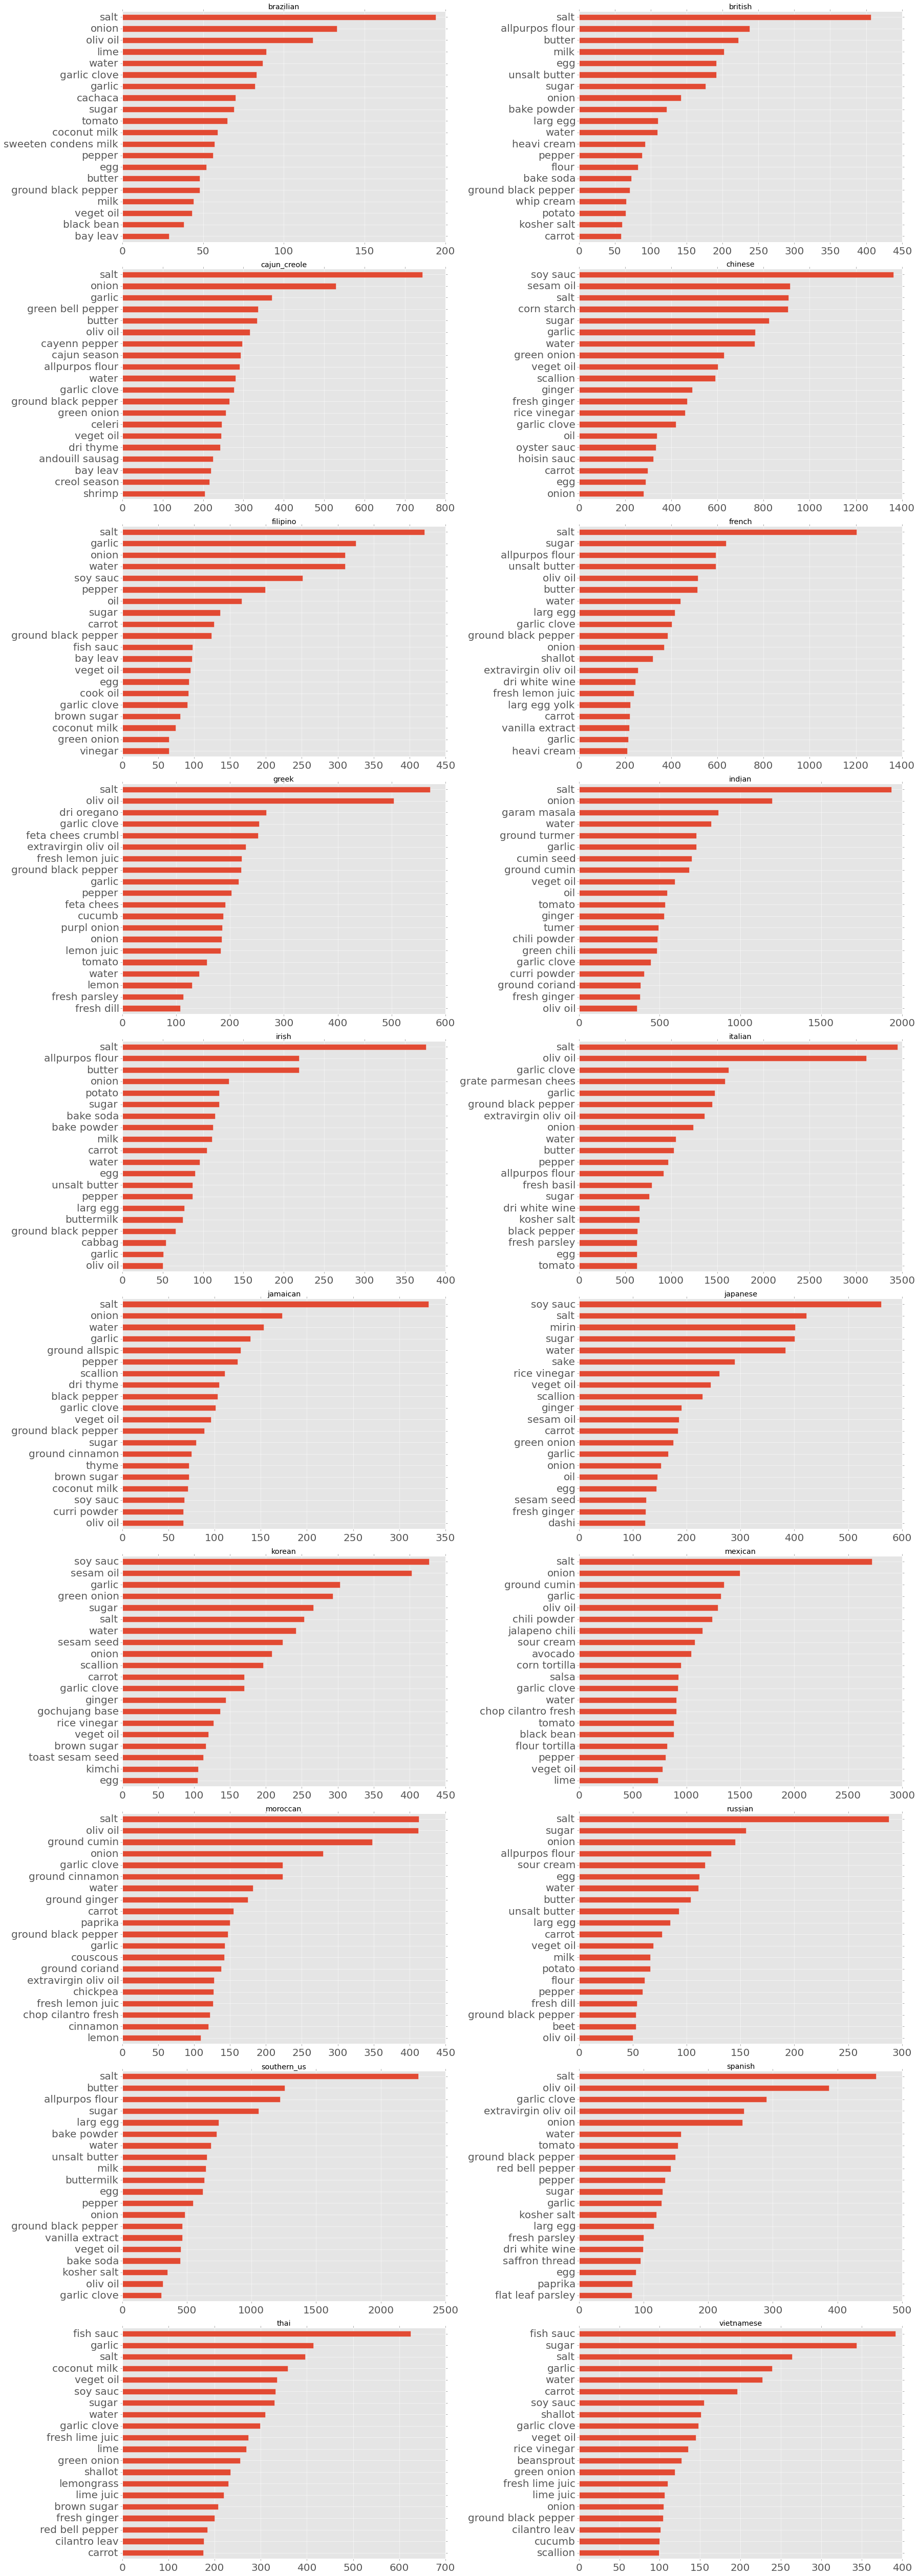

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(25,70))
for cuisine_count, ingredient_list in enumerate(list(training_cuisine_all_ingredients)):
    pd.DataFrame(ingredient_list, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:20]\
                     .plot(subplots=True, sharex=False, sharey=False, kind='barh',ax=axes[int(cuisine_count/2), int(cuisine_count%2)], fontsize=20)    
    axes[int(cuisine_count/2), int(cuisine_count%2)].invert_yaxis()
    axes[int(cuisine_count/2), int(cuisine_count%2)].set_title(training_cuisine_ingredient_corpus['cuisine'][cuisine_count])
fig.tight_layout()

#### 1) Here, we see that the most common ingredient in most of the cuisines is salt. 
#### 2) However, in *'Thai'* & *'Vietnamese'*, the most common ingredient is *'Fish Sauce'*.
#### 3) Also, in *'Korean'*, *'Chinese'* and *'Japanese'* dishes, *'Soy Sauce'* is the most commmon ingredient.
#### 4) *'All Purpose Flour'* is a very commmon ingredient in most European cuisines like *'British'*, *'French'*, *'Irish'*, along with *'Russian'* and *'Southern US'* cuisines.
#### 5) *'Garam Masala'* is one of the most distinguishing ingredients used in *'Indian'* recipies.
#### 6) *'Mirin'* is one of the most distinguishing ingredients used in *'Japanese'* recipies.
#### 7) *'Cheese'* is among the top in the most commonly used ingredient in *'Italian'* dishes, as seen in the grated cheese in Pastas, Pizzas and a whole range of Italian dishes..
#### 8) *'Southern US'* cuisines have Flour, Eggs, Baking powder, Sugar, Butter as their most common ingredients. These ingredients actually typify the type of food in this cuisine (mixture of sweet and savory baking dishes).

### (f) *Creating the Bag-of-Ingredients Model*

In [12]:
%%time
training_ingredients_features = pd.DataFrame(training_load_data, columns=['cuisine', 'ingredients'])

for recipe_id in range(0,len(training_ingredients_features)):
    training_ingredients_features['ingredients'].loc[recipe_id] = map(removePunctuation,training_ingredients_features['ingredients'].loc[recipe_id])
    training_ingredients_features['ingredients'].loc[recipe_id] = map(stemWords,training_ingredients_features['ingredients'].loc[recipe_id])
    training_ingredients_features['ingredients'].loc[recipe_id] = list(' '.join(innerListElement) for innerListElement in training_ingredients_features['ingredients'].loc[recipe_id])
    training_ingredients_features['ingredients'].loc[recipe_id] = map(removeStopWords,training_ingredients_features['ingredients'].loc[recipe_id])
    training_ingredients_features['ingredients'].loc[recipe_id] = list(' '.join(innerListElement) for innerListElement in training_ingredients_features['ingredients'].loc[recipe_id])
training_ingredients_features['ingredients'] = [' '.join(item) for item in training_ingredients_features['ingredients']]

CPU times: user 4min 56s, sys: 30.2 s, total: 5min 26s
Wall time: 5min 43s


In [13]:
%%time
testing_ingredients_features = pd.DataFrame(testing_load_data, columns=['ingredients'])
for loop_id in range(0,len(testing_ingredients_features)):
    testing_ingredients_features['ingredients'].loc[loop_id] = map(removePunctuation,testing_ingredients_features['ingredients'].loc[loop_id])
    testing_ingredients_features['ingredients'].loc[loop_id] = map(stemWords,testing_ingredients_features['ingredients'].loc[loop_id])
    testing_ingredients_features['ingredients'].loc[loop_id] = list(' '.join(innerListElement) for innerListElement in testing_ingredients_features['ingredients'].loc[loop_id])
    testing_ingredients_features['ingredients'].loc[loop_id] = map(removeStopWords,testing_ingredients_features['ingredients'].loc[loop_id])
    testing_ingredients_features['ingredients'].loc[loop_id] = list(' '.join(innerListElement) for innerListElement in testing_ingredients_features['ingredients'].loc[loop_id])
testing_ingredients_features['ingredients'] = [' '.join(item) for item in testing_ingredients_features['ingredients']]        

CPU times: user 50.3 s, sys: 7.93 s, total: 58.2 s
Wall time: 1min 2s


In [14]:
training_ingredients_features = pd.DataFrame(training_load_data.id).join(training_ingredients_features)
testing_ingredients_features = pd.DataFrame(testing_load_data.id).join(testing_ingredients_features)
combined_ingredients_features = pd.concat([training_ingredients_features, testing_ingredients_features],join='inner',ignore_index=True)

In [15]:
print "Creating the bag of ingredients...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of ingredients tool.  
document_matrix = CountVectorizer(analyzer = "word", max_features = 300) 

# fit_transform() does two functions: 
# First, it fits the model and learns the ingredient vocabulary. 
# Second, it transforms our training data into feature vectors. 

# Sparse Ingredient Matrix
combined_ingredients_DTM = document_matrix.fit_transform(combined_ingredients_features['ingredients'])
# Dense Ingredient Matrix
combined_ingredients_DTM_array = combined_ingredients_DTM.toarray()
print "The bag of ingredients has been created!\n"

Creating the bag of ingredients...

The bag of ingredients has been created!



In [16]:
training_ingredients_DTM = combined_ingredients_DTM[:len(training_ingredients_features),]
training_ingredients_DTM_array = combined_ingredients_DTM_array[:len(training_ingredients_features),]
testing_ingredients_DTM = combined_ingredients_DTM[len(training_ingredients_features):]
testing_ingredients_DTM_array = combined_ingredients_DTM_array[len(training_ingredients_features):]

## Part 3: Applied Predictive Modeling in Python

### (a) *Creating a Multinomial Naive Bayes Model*
#### *Run Cross Validation*

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

multinomial_naive_bayes_model = MultinomialNB()
multinomial_nb_params = {
    'alpha': np.linspace(0,1,11),
}
gradient_search_mnb = GridSearchCV(multinomial_naive_bayes_model, multinomial_nb_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_mnb.fit(training_ingredients_DTM, training_load_data.cuisine)
sorted(gradient_search_mnb.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.66046, std: 0.00510, params: {'alpha': 1.0},
 mean: 0.66051, std: 0.00517, params: {'alpha': 0.0},
 mean: 0.66056, std: 0.00503, params: {'alpha': 0.80000000000000004},
 mean: 0.66066, std: 0.00498, params: {'alpha': 0.60000000000000009},
 mean: 0.66066, std: 0.00512, params: {'alpha': 0.90000000000000002},
 mean: 0.66071, std: 0.00504, params: {'alpha': 0.70000000000000007},
 mean: 0.66086, std: 0.00546, params: {'alpha': 0.20000000000000001},
 mean: 0.66091, std: 0.00541, params: {'alpha': 0.40000000000000002},
 mean: 0.66093, std: 0.00525, params: {'alpha': 0.5},
 mean: 0.66103, std: 0.00549, params: {'alpha': 0.30000000000000004},
 mean: 0.66124, std: 0.00520, params: {'alpha': 0.10000000000000001}]

#### *Test the best model given by the cross validation results*

In [19]:
from sklearn.naive_bayes import MultinomialNB
multinomial_naive_bayes_model = MultinomialNB(alpha=0.1)
multinomial_naive_bayes_model.fit(training_ingredients_DTM,training_load_data.cuisine)
mnb_predicted_labels = multinomial_naive_bayes_model.predict(testing_ingredients_DTM)
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":mnb_predicted_labels})
output.to_csv("../../Submissions/mnb_submission.csv", index=False, header=True, columns=["id","cuisine"])
# 0.65306 Kaggle Score

### (b) *Creating a Bernouilli Naive Bayes Model*
#### *Run Cross Validation*

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.grid_search import GridSearchCV

bernoulli_naive_bayes_model = BernoulliNB()
bernoulli_nb_params = {
    'alpha': np.linspace(0,1,11),
}

gradient_search_bnb = GridSearchCV(bernoulli_naive_bayes_model, bernoulli_nb_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_bnb.fit(training_ingredients_DTM, training_load_data.cuisine)
sorted(gradient_search_bnb.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.65022, std: 0.00604, params: {'alpha': 1.0},
 mean: 0.65030, std: 0.00616, params: {'alpha': 0.90000000000000002},
 mean: 0.65040, std: 0.00672, params: {'alpha': 0.0},
 mean: 0.65048, std: 0.00627, params: {'alpha': 0.80000000000000004},
 mean: 0.65053, std: 0.00620, params: {'alpha': 0.70000000000000007},
 mean: 0.65058, std: 0.00642, params: {'alpha': 0.60000000000000009},
 mean: 0.65085, std: 0.00641, params: {'alpha': 0.5},
 mean: 0.65108, std: 0.00677, params: {'alpha': 0.40000000000000002},
 mean: 0.65113, std: 0.00695, params: {'alpha': 0.30000000000000004},
 mean: 0.65120, std: 0.00721, params: {'alpha': 0.10000000000000001},
 mean: 0.65130, std: 0.00710, params: {'alpha': 0.20000000000000001}]

#### *Test the best model given by the cross validation results*

In [21]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_naive_bayes_model = BernoulliNB(alpha=0.2)
bernoulli_naive_bayes_model.fit(training_ingredients_DTM,training_load_data.cuisine)
bnb_predicted_labels = bernoulli_naive_bayes_model.predict(testing_ingredients_DTM)
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":bnb_predicted_labels})
output.to_csv("../../Submissions/bnb_submission.csv", index=False, header=True, columns=["id","cuisine"])
# 0.64220 Kaggle Score 

### (c) *Creating an Adaboost Classifier*
#### *Run Cross Validation*

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from time import time

adaboost_model = AdaBoostClassifier()
ab_params = {
    'n_estimators': range(250,1001,250), 
    'learning_rate': np.linspace(0.3,0.7,5),
}
# Recored the time it takes to perform the search
start = time()
gradient_search_adaboost = GridSearchCV(adaboost_model, ab_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_adaboost.fit(training_ingredients_DTM_array, training_load_data.cuisine)
print("Adaboost Training finished in %.2f seconds" % (time() - start))

Adaboost Training finished in 9392.26 seconds


In [20]:
sorted(gradient_search_adaboost.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.40801, std: 0.01580, params: {'n_estimators': 1000, 'learning_rate': 0.69999999999999996},
 mean: 0.44569, std: 0.01899, params: {'n_estimators': 1000, 'learning_rate': 0.59999999999999998},
 mean: 0.45924, std: 0.01476, params: {'n_estimators': 750, 'learning_rate': 0.69999999999999996},
 mean: 0.48051, std: 0.01741, params: {'n_estimators': 1000, 'learning_rate': 0.5},
 mean: 0.49261, std: 0.01605, params: {'n_estimators': 750, 'learning_rate': 0.59999999999999998},
 mean: 0.52366, std: 0.02293, params: {'n_estimators': 1000, 'learning_rate': 0.39999999999999997},
 mean: 0.52954, std: 0.01947, params: {'n_estimators': 500, 'learning_rate': 0.69999999999999996},
 mean: 0.53022, std: 0.01881, params: {'n_estimators': 750, 'learning_rate': 0.5},
 mean: 0.55710, std: 0.01861, params: {'n_estimators': 500, 'learning_rate': 0.59999999999999998},
 mean: 0.57465, std: 0.01794, params: {'n_estimators': 750, 'learning_rate': 0.39999999999999997},
 mean: 0.57776, std: 0.01828, params: 

#### *Test the best model given by the cross validation results*

In [24]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(learning_rate=0.4, n_estimators=250)
adaboost_model.fit(training_ingredients_DTM_array,training_load_data.cuisine)
adaboost_predicted_labels = adaboost_model.predict(testing_ingredients_DTM_array)
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":adaboost_predicted_labels})
output.to_csv("../../Submissions/adb_submission.csv", index=False, header=True, columns=["id","cuisine"])
# 0.64722 Kaggle Score 

### (d) *Creating a Random Forest Classifier*
#### *Run Cross Validation*

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time

random_forest_model = RandomForestClassifier()
rf_params = {
    'n_estimators': range(250,1001,250), 
    'max_depth': [10,25,50],
}
# Recored the time it takes to perform the search
start = time()
gradient_search_rf = GridSearchCV(random_forest_model, rf_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_rf.fit(training_ingredients_DTM_array, training_load_data.cuisine)
sorted(gradient_search_rf.grid_scores_, key=lambda x: x.mean_validation_score)
print("Random Forest Training finished in %.2f seconds" % (time() - start))

Random Forest Training finished in 3080.76 seconds


In [ ]:
sorted(gradient_search_rf.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.56620, std: 0.00622, params: {'n_estimators': 750, 'max_depth': 10},
 mean: 0.56638, std: 0.00656, params: {'n_estimators': 250, 'max_depth': 10},
 mean: 0.56668, std: 0.00492, params: {'n_estimators': 500, 'max_depth': 10},
 mean: 0.56751, std: 0.00648, params: {'n_estimators': 1000, 'max_depth': 10},
 mean: 0.69442, std: 0.00567, params: {'n_estimators': 250, 'max_depth': 25},
 mean: 0.69457, std: 0.00602, params: {'n_estimators': 500, 'max_depth': 25},
 mean: 0.69498, std: 0.00569, params: {'n_estimators': 1000, 'max_depth': 25},
 mean: 0.69503, std: 0.00579, params: {'n_estimators': 750, 'max_depth': 25},
 mean: 0.74111, std: 0.00709, params: {'n_estimators': 250, 'max_depth': 50},
 mean: 0.74187, std: 0.00567, params: {'n_estimators': 500, 'max_depth': 50},
 mean: 0.74257, std: 0.00616, params: {'n_estimators': 750, 'max_depth': 50},
 mean: 0.74270, std: 0.00574, params: {'n_estimators': 1000, 'max_depth': 50}]

#### *Test the best model given by the cross validation results*

In [ ]:
best_random_forest_model = RandomForestClassifier(n_estimators=1000, max_depth=50)
best_random_forest_model.fit(training_ingredients_DTM_array,training_load_data.cuisine)
rf_prediction_labels = best_random_forest_model.predict(testing_ingredients_DTM_array)
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":rf_prediction_labels})
output.to_csv("../../Submissions/rf_submission.csv", index=False, header=True, columns=["id","cuisine"])
# 0.73994 Kaggle Score

### (e) *Creating a Extra Trees Classifier*
#### *Run Cross Validation*

In [18]:
from sklearn.ensemble import ExtraTreesClassifier 
from time import time
from sklearn.grid_search import GridSearchCV

extra_trees_model = ExtraTreesClassifier()
et_params = {
    'n_estimators': range(250,1001,250), 
    'max_depth': [50, 75, 100], #[5, 10, 25],
}
# Recored the time it takes to perform the search
start = time()
gradient_search_et = GridSearchCV(extra_trees_model, et_params, cv=10, scoring='accuracy', n_jobs=4)
gradient_search_et.fit(training_ingredients_DTM_array, training_load_data.cuisine)
sorted(gradient_search_et.grid_scores_, key=lambda x: x.mean_validation_score)
print("Extra Trees Training finished in %.2f" % (time() - start))
# extra_trees_gbm.feature_importances_ for feature imp

Extra Trees Training finished in 9606.07


In [19]:
sorted(gradient_search_et.grid_scores_, key=lambda x: x.mean_validation_score)

[mean: 0.74886, std: 0.00604, params: {'n_estimators': 250, 'max_depth': 50},
 mean: 0.74964, std: 0.00420, params: {'n_estimators': 500, 'max_depth': 50},
 mean: 0.75104, std: 0.00404, params: {'n_estimators': 750, 'max_depth': 50},
 mean: 0.75122, std: 0.00448, params: {'n_estimators': 1000, 'max_depth': 50},
 mean: 0.75645, std: 0.00450, params: {'n_estimators': 250, 'max_depth': 100},
 mean: 0.75657, std: 0.00464, params: {'n_estimators': 250, 'max_depth': 75},
 mean: 0.75665, std: 0.00507, params: {'n_estimators': 500, 'max_depth': 100},
 mean: 0.75688, std: 0.00456, params: {'n_estimators': 750, 'max_depth': 100},
 mean: 0.75728, std: 0.00490, params: {'n_estimators': 1000, 'max_depth': 100},
 mean: 0.75743, std: 0.00415, params: {'n_estimators': 500, 'max_depth': 75},
 mean: 0.75771, std: 0.00479, params: {'n_estimators': 1000, 'max_depth': 75},
 mean: 0.75879, std: 0.00423, params: {'n_estimators': 750, 'max_depth': 75}]

#### *Test the best model given by the cross validation results*

In [20]:
best_et_model = ExtraTreesClassifier(n_estimators=750, max_depth=75)
best_et_model.fit(training_ingredients_DTM_array,training_load_data.cuisine)
et_prediction_labels = best_et_model.predict(testing_ingredients_DTM_array)
output = pd.DataFrame(data={"id":testing_load_data.id, "cuisine":et_prediction_labels})
output.to_csv("../../Submissions/et_submission.csv", index=False, header=True, columns=["id","cuisine"])
# 0.75754 Kaggle Score -- Best score so far

## Part 4: Applied Predictive Modeling in R

In [26]:
%load_ext rpy2.ipython

#### *Loading the data*

In [27]:
%%R
library(jsonlite)
train.data <- fromJSON("../Data/train.json", flatten=T)
test.data <- fromJSON("../Data/test.json", flatten=T)
combined.data.frame <- rbind(train.data[!names(train.data) %in% "cuisine"], test.data)


Attaching package: ‘jsonlite’

The following object is masked from ‘package:utils’:

    View



#### *Pre-Processing the data & creating the Document (Ingredient) Matrix*

In [30]:
%%R
require(tm)
combined.ingredients <- Corpus(VectorSource(combined.data.frame$ingredients))
combined.ingredients <- tm_map(combined.ingredients, content_transformer(tolower))
combined.ingredients <- tm_map(combined.ingredients, stripWhitespace)
combined.ingredients <- tm_map(combined.ingredients, removeNumbers)
combined.ingredients <- tm_map(combined.ingredients, removePunctuation)
require(SnowballC)
combined.ingredients <- tm_map(combined.ingredients, stemDocument)
combined.ingredients.DTM <- DocumentTermMatrix(combined.ingredients)
combined.ingredients.sparse.DTM <- removeSparseTerms(combined.ingredients.DTM, 0.99)
combined.ingredients.sparse.DTM <- as.data.frame(as.matrix(combined.ingredients.sparse.DTM))

#### *Split the data into training-validation-testing sets*

In [31]:
%%R
training.samples = dim(train.data)[1]
training.ingredients.DTM = combined.ingredients.sparse.DTM[1:training.samples,]
training.ingredients.DTM$cuisine = as.factor(train.data$cuisine)
require(caret)
partition.training.samples <- sample(training.samples, 0.7 * training.samples)
training.subset.DTM <- training.ingredients.DTM[partition.training.samples,]
validating.subset.DTM <- training.ingredients.DTM[-partition.training.samples,]

testing.samples = dim(test.data)[1]
testing.ingredients.DTM = combined.ingredients.sparse.DTM[(training.samples+1):(training.samples+testing.samples),]

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



### (a) *Creating a CART Classifier*
#### *Run Cross Validation*

In [32]:
%%R
require(rpart)
require(MASS)
cart.model.fit <- rpart(cuisine ~., data = training.subset.DTM, method = "class")
cart.model.predicted.cuisine <- predict(cart.model.fit, newdata = validating.subset.DTM, type = "class")
cart.confusion.matrix <- confusionMatrix(cart.model.predicted.cuisine, validating.subset.DTM$cuisine)
cart.confusion.matrix

Confusion Matrix and Statistics

              Reference
Prediction     brazilian british cajun_creole chinese filipino french greek
  brazilian            0       0            0       0        0      0     0
  british              0       0            0       0        0      0     0
  cajun_creole         0       0            0       0        0      0     0
  chinese              1       2            2     629       86      1     2
  filipino             0       0            0       0        0      0     0
  french               0       0            0       0        0      0     0
  greek                0       0            0       0        0      0     0
  indian               0       0            0       0        0      0     0
  irish                0       0            0       0        0      0     0
  italian             43      21          120      13        8    268   213
  jamaican             0       0            0       0        0      0     0
  japanese             0       

#### *Test the CART Model*

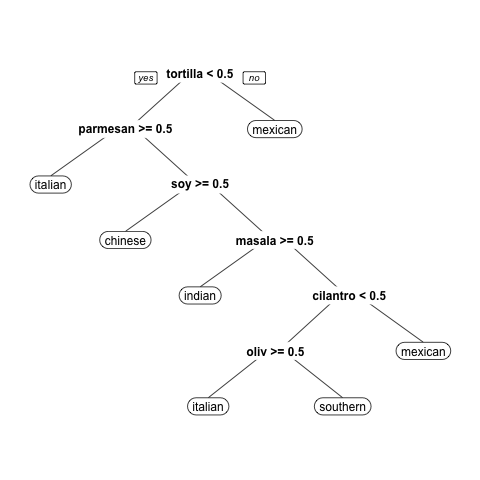

In [33]:
%%R
require(rpart)
require(rpart.plot)
require(MASS)
cart.model.fit <- rpart(cuisine ~., data = training.ingredients.DTM, method = "class")
prp(cart.model.fit)
cart.model.predicted.cuisine <- predict(cart.model.fit, newdata = testing.ingredients.DTM, type = "class")

cart.model.output.data <- as.data.frame(cbind(test.data$id,as.character(cart.model.predicted.cuisine)))
colnames(cart.model.output.data) <- c("id", "cuisine")
write.table(format(cart.model.output.data, scientific=FALSE), file = "../../Submissions/cart_submission.csv", sep=",",quote = F, row.names=F)
# 0.40185 Kaggle Score

### (b) *Creating an Extreme Gradient Boosting Model*
#### *Run Cross Validation*

In [34]:
%%R
require(xgboost)
xgb.grid <- expand.grid(nround = c(25,50,100), max.depth = c(10,25), eta = c(0.4,0.6))
xgb.document.matrix <- xgb.DMatrix(as.matrix(training.subset.DTM[!names(training.subset.DTM) %in% "cuisine"]),label=as.numeric(training.subset.DTM$cuisine)-1)
for(i in 1:nrow(xgb.grid)) {
  model.xgb.train <- xgboost(data = xgb.document.matrix, nthread=3, nround =xgb.grid[i,'nround'], max.depth=xgb.grid[i,'max.depth'], eta=xgb.grid[i,'eta'], objective = "multi:softmax", verbose = 0,num_class=20)
  xgb.model.predicted.cuisine <- predict(model.xgb.train,as.matrix(validating.subset.DTM[!names(validating.subset.DTM) %in% "cuisine"]))
  xgb.model.predicted.cuisine <- factor(xgb.model.predicted.cuisine,labels=levels(training.subset.DTM$cuisine))
  xgb.confusion.matrix <- confusionMatrix(xgb.model.predicted.cuisine,validating.subset.DTM$cuisine)
  print(format(list(nthread=3, nround =xgb.grid[i,'nround'], max.depth=xgb.grid[i,'max.depth'], eta=xgb.grid[i,'eta'],accuracy = xgb.confusion.matrix$overall[1])))
}

Loading required package: xgboost
    nthread      nround   max.depth         eta    accuracy 
        "3"        "25"        "10"       "0.4" "0.7306629" 
    nthread      nround   max.depth         eta    accuracy 
        "3"        "50"        "10"       "0.4" "0.7375346" 
    nthread      nround   max.depth         eta    accuracy 
        "3"       "100"        "10"       "0.4" "0.7433169" 
    nthread      nround   max.depth         eta    accuracy 
        "3"        "25"        "25"       "0.4" "0.7299087" 
    nthread      nround   max.depth         eta    accuracy 
        "3"        "50"        "25"       "0.4" "0.7361099" 
    nthread      nround   max.depth         eta    accuracy 
        "3"       "100"        "25"       "0.4" "0.7403838" 
    nthread      nround   max.depth         eta    accuracy 
        "3"        "25"        "10"       "0.6" "0.7196849" 
    nthread      nround   max.depth         eta    accuracy 
        "3"        "50"        "10"       "0.6" "0.

#### *Test the best model given by the cross validation results*

In [36]:
%%R
xgb.document.matrix <- xgb.DMatrix(as.matrix(training.ingredients.DTM[!names(training.ingredients.DTM) %in% "cuisine"]),label=as.numeric(training.ingredients.DTM$cuisine)-1)
model.xgb.train <- xgboost(data = xgb.document.matrix, nthread=3, nround = 100, max.depth = 10, eta=0.4, objective = "multi:softmax", verbose = 0,num_class=20)
xgb.model.predicted.cuisine <- predict(model.xgb.train,as.matrix(testing.ingredients.DTM[!names(testing.ingredients.DTM) %in% "cuisine"]))
xgb.model.predicted.cuisine <- factor(xgb.model.predicted.cuisine,labels=levels(training.ingredients.DTM$cuisine))
xgb.model.output.data <- as.data.frame(cbind(test.data$id,as.character(xgb.model.predicted.cuisine)))
colnames(xgb.model.output.data) <- c("id", "cuisine")
write.table(format(xgb.model.output.data, scientific=FALSE), file = "../../Submissions/xgb_submission.csv", sep=",",quote = F, row.names=F)
# 0.74537 Kaggle Score

## Part 5: Conclusions

#### 1. The figure in Part 2 (d) helps us to conclude that along with **'Salt'**, few of the other common ingredients present in most of the recipies include:
* *Onions*
* *Olive Oil*
* *Water*
* *Garlic*
* *Sugar*

#### 2. Part 2 (e) helps us to identify major distinguishing ingredients in most of the cuisines. Eg.:
* In **'Thai'** & **'Vietnamese'** dishes, the most common ingredient is **'Fish Sauce'**. 
* In **'Korean'**, **'Chinese'** and **'Japanese'** dishes, **'Soy Sauce'** is the most commmon ingredient
* **'Garam Masala'** is one of the most distinguishing ingredients used in **'Indian'** recipies. 
* **'Mirin'** is one of the most distinguishing ingredients used in **'Japanese'** recipies
* **'Cheese'** is among the top in the most commonly used ingredient in **'Italian'** dishes. 
* **'All Purpose Flour'** is very commmon in most European cuisines like **'British'**, **'French'**, **'Irish'**.
* **'Southern US'** cuisines have **Flour, Eggs, Baking powder, Sugar, Butter** as their most common ingredients.

#### 3. The following models were created for classifying recipies into cuisines: 
* Bayesian Models (Multinomial Naive Bayes and Bernoulli Naive Bayes), in Python
* Boosting Models (Adaboost, Random Forests, Extra Trees), in Python
* Tree Based and Boosting Models (CART and Extreme Gradient Boosting), in R

#### The Bayesian Classifiers took in as input sparse ingredient matrices, while all others took in as input dense ingredient matrices. The Models which took in dense matrices gave us better results, at a cost of added training/testing time. Hence, while sparse matrices help us speeding up the classification process, it does so at the cost of reducing the accuracy of the classification (in this particular case).

#### 4. While the Bayesian models gave approximately equal accuracies of ~0.65, the Boosting Models gave much better results as would have been expected. However, the AdaBoost Classifier gives us a maximum accuracy of around ~.65 (which is marginally better than the Bernoulli Naive Bayes Classifier). 

#### 5. The Random Forest Classifier, Extra Trees Classifier and the Extreme Gradient Boosting Classifier (in R) gave the best results, as seen by the following Kaggle Scores: 
* ***Extra Trees:*** **0.7575**
* ***Extreme Gradient Boosting:*** **0.7454**
* ***Random Forest:*** **0.7399** 

#### 6. What else can be done???
* We now have an idea of which ingredient is more commonly used in which particular cuisine. Hence, while deciding the optimum location of opening a new restaurant with a particular cuisine in mind, these points can be taken into consideration. 
* Also, many competitions like the famous MasterChef TV series require us to create a dish using a Mystery Box of ingredients. An effective an accurate model like this can help amateur chefs in deciding which particular cuisine can be created using a limited set of ingredients.
    